# Project: TMDb dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

In [648]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 2. Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### 2.1. General Properties

In [649]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape

(10866, 21)

In [650]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [652]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### 2.2. Data Cleaning (Replace this with more specific notes!)

In [653]:
# Considering the 2 questions chosen, select 
#[id, original_title, budget, revenue, cast, director, vote_count, vote_average, release_year, budget_adj, revenue_adj]
df = df[['id', 'original_title', 'budget', 'revenue', 'cast', 'director', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]

In [654]:
#drop na
df.dropna(inplace = True)

In [655]:
#clean all that budget == 0

df.query('budget != 0', inplace = True)

In [656]:
df.shape

(5155, 11)

<a id='eda'></a>
## 3. Exploratory Data Analysis



### 3.1. Which word in the title is most profitable
#### 3.1.1. Explore the nature of titles

In [657]:
df.original_title.unique()

array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
       'Fantastic Voyage', 'The Ghost & Mr. Chicken',
       'Manos: The Hands of Fate'], dtype=object)

In [658]:
df_title = df[['id', 'original_title', 'budget', 'revenue', 'revenue_adj']]

In [659]:
df_title['clean_title'] = df['original_title'].str.replace('[^\w\s]', '')

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [660]:
df_title.clean_title.unique()

array(['Jurassic World', 'Mad Max Fury Road', 'Insurgent', ...,
       'Fantastic Voyage', 'The Ghost  Mr Chicken',
       'Manos The Hands of Fate'], dtype=object)

In [718]:
def word_count(x):
    return(len(x.split(' ')))

wrd_len = np.array([])
for i, s in enumerate(df_title.clean_title):
    wrd_len = np.append(wrd_len, word_count(s))
print(wrd_len.max())
# not very useful, just curious

20.0


In [719]:
for i, n in enumerate(df_title.clean_title):
    if word_count(n) == 20:
        print(i, n)

5098 Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes


#### 3.1.2. To split the title name into words (The following method came from https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e)

In [720]:
df_title_analyse = pd.DataFrame(df_title.clean_title.str.split(' ').tolist(), index = [df_title.budget, df_title.revenue, df_title.revenue_adj, df_title.original_title]).stack()

In [721]:
df_title_analyse

budget     revenue     revenue_adj   original_title             
150000000  1513528810  1.392446e+09  Jurassic World            0    Jurassic
                                                               1       World
           378436354   3.481613e+08  Mad Max: Fury Road        0         Mad
                                                               1         Max
                                                               2        Fury
                                                                      ...   
19000      0           0.000000e+00  Manos: The Hands of Fate  0       Manos
                                                               1         The
                                                               2       Hands
                                                               3          of
                                                               4        Fate
Length: 13942, dtype: object

In [722]:
df_title_analyse = df_title_analyse.reset_index([0, 'budget', 'revenue', 'revenue_adj', 'original_title'])

In [723]:
df_title_analyse.columns = ['budget', 'revenue', 'revenue_adj', 'original_title', 'words']

In [724]:
df_title_analyse.head()

,budget,revenue,revenue_adj,original_title,words
0,150000000,1513528810,1.392446e+09,Jurassic World,Jurassic
1,150000000,1513528810,1.392446e+09,Jurassic World,World
2,150000000,378436354,3.481613e+08,Mad Max: Fury Road,Mad
3,150000000,378436354,3.481613e+08,Mad Max: Fury Road,Max
4,150000000,378436354,3.481613e+08,Mad Max: Fury Road,Fury


In [725]:
df_title_analyse.shape

(13942, 5)

#### 3.1.3. Combine words 

In [726]:
df_title_analyse.words = df_title_analyse.words.str.lower()

In [727]:
# pick prepositions manually
df_title_analyse.words.value_counts()[:50]

the         1563
of           451
a            158
in           141
2            127
and          125
to            97
              95
man           71
dead          52
ii            48
i             47
love          46
for           44
on            43
night         41
with          39
day           39
house         37
movie         37
me            37
from          37
last          36
part          35
my            35
3             33
you           32
life          32
dark          31
american      31
big           30
little        30
black         29
iii           26
star          26
girl          26
new           25
at            25
story         24
kill          24
all           24
out           23
good          23
death         23
days          23
one           23
world         22
city          22
red           22
time          22
Name: words, dtype: int64

In [728]:
prepositions = ['the', 'of', 'a', 'in', 'and', 'to', '2', 'on', 'for', 'with',
               '3', 'from', 'at', 'it', 'is', 'one', 'all', ' ']

In [729]:
df_title_analyse.drop(df_title_analyse[df_title_analyse.words.isin(prepositions)].index, inplace=True)

In [730]:
df_title_analyse.shape

(10972, 5)

In [731]:
df_title_analyse.words.value_counts()

              95
man           71
dead          52
ii            48
i             47
              ..
goldmember     1
dorothy        1
rocks          1
penis          1
torn           1
Name: words, Length: 4889, dtype: int64

In [732]:
df_title_analyse.head()

,budget,revenue,revenue_adj,original_title,words
0,150000000,1513528810,1.392446e+09,Jurassic World,jurassic
1,150000000,1513528810,1.392446e+09,Jurassic World,world
2,150000000,378436354,3.481613e+08,Mad Max: Fury Road,mad
3,150000000,378436354,3.481613e+08,Mad Max: Fury Road,max
4,150000000,378436354,3.481613e+08,Mad Max: Fury Road,fury


In [733]:
df_title_analyse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10972 entries, 0 to 13941
Data columns (total 5 columns):
budget            10972 non-null int64
revenue           10972 non-null int64
revenue_adj       10972 non-null float64
original_title    10972 non-null object
words             10972 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 514.3+ KB


#### 3.1.4. Results and visualizations

In [734]:
df_title_result = df_title_analyse.groupby(['words']).sum()

In [735]:
df_title_result['revenue_budget_ratio'] = df_title_result.revenue / df_title_result.budget

In [736]:
# define plot word numbers:
n = 20

In [737]:
df_plot_ratio = df_title_result.sort_values(by = 'revenue_budget_ratio', ascending = False)[:n]
df_plot_revenue = df_title_result.sort_values(by = 'revenue_adj', ascending = False)[1:n+1]

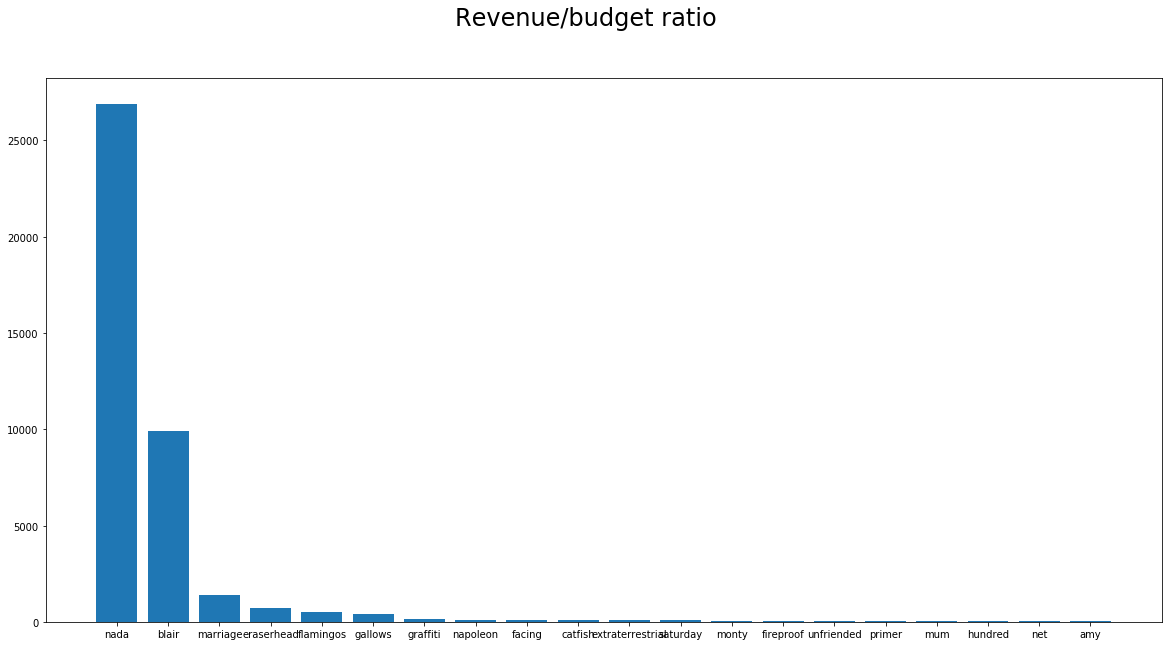

According to ratio, top 20 beneficial words in movie titles are ['nada', 'blair', 'marriage', 'eraserhead', 'flamingos', 'gallows', 'graffiti', 'napoleon', 'facing', 'catfish', 'extraterrestrial', 'saturday', 'monty', 'fireproof', 'unfriended', 'primer', 'mum', 'hundred', 'net', 'amy']


In [738]:
fig1 = plt.figure(figsize = (20,10))
fig1.suptitle('Revenue/budget ratio', fontsize = 24)

rt = fig1.add_subplot(111)
rt.bar(x = df_plot_ratio.index, height = df_plot_ratio.revenue_budget_ratio)
plt.show()
print("According to ratio, top 20 beneficial words in movie titles are {}".format(list(df_plot_ratio.index)))

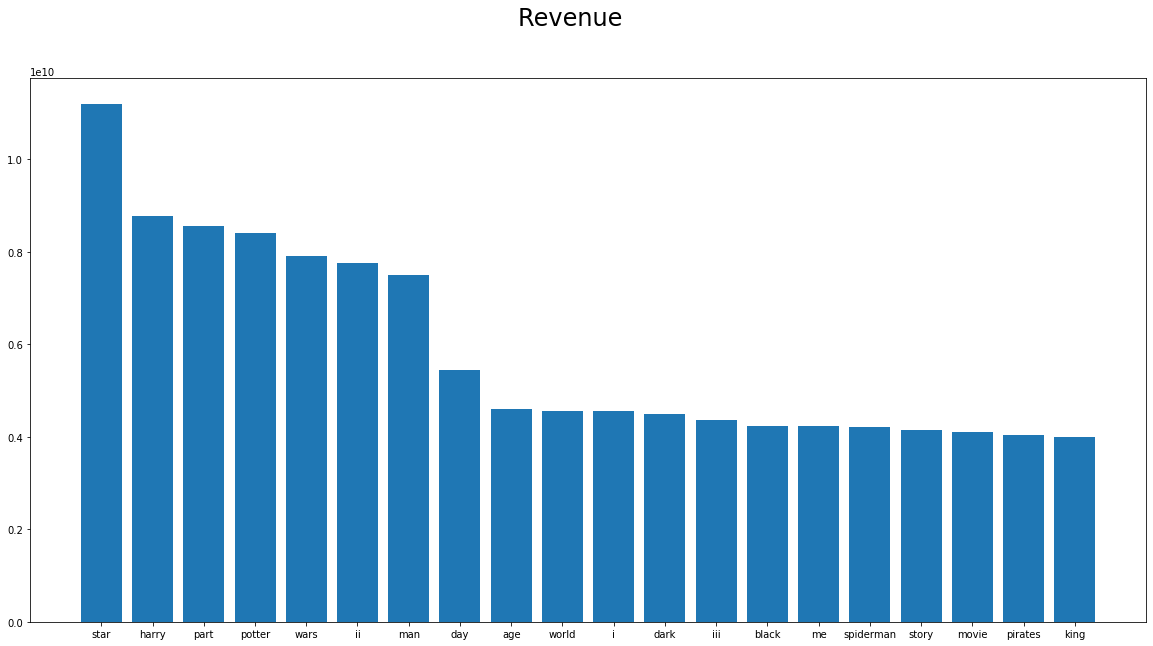

According to revenue, top 20 beneficial words in movie titles are ['star', 'harry', 'part', 'potter', 'wars', 'ii', 'man', 'day', 'age', 'world', 'i', 'dark', 'iii', 'black', 'me', 'spiderman', 'story', 'movie', 'pirates', 'king']


In [739]:
fig2 = plt.figure(figsize = (20, 10))
fig2.suptitle('Revenue', fontsize = 24)

rvn = fig2.add_subplot(111)
rvn.bar(x = df_plot_revenue.index, height = df_plot_revenue.revenue_adj)
plt.show()
print("According to revenue, top 20 beneficial words in movie titles are {}".format(list(df_plot_revenue.index)))

In [740]:
prof_words_ratio = list(df_plot_ratio.index)
prof_words_reven = list(df_plot_revenue.index)

In [742]:
for i in prof_words_ratio:
    print(i, i in prof_words_reven)

nada False
blair False
marriage False
eraserhead False
flamingos False
gallows False
graffiti False
napoleon False
facing False
catfish False
extraterrestrial False
saturday False
monty False
fireproof False
unfriended False
primer False
mum False
hundred False
net False
amy False


In [746]:
# Another way of doing it
set(list(prof_words_ratio)).difference(list(prof_words_reven))

{'amy',
 'blair',
 'catfish',
 'eraserhead',
 'extraterrestrial',
 'facing',
 'fireproof',
 'flamingos',
 'gallows',
 'graffiti',
 'hundred',
 'marriage',
 'monty',
 'mum',
 'nada',
 'napoleon',
 'net',
 'primer',
 'saturday',
 'unfriended'}

In [747]:
df_title_analyse[df_title_analyse.words.isin(prof_words_ratio)]

,budget,revenue,revenue_adj,original_title,words
265,1000000,62882090,5.785150e+07,Unfriended,unfriended
393,100000,42664410,3.925124e+07,The Gallows,gallows
1189,3500000,237113184,8.530813e+08,Saturday Night Fever,saturday
1207,10000,7000000,2.518447e+07,Eraserhead,eraserhead
2420,30000,3045943,3.045943e+06,Catfish,catfish
2666,25000,248000000,3.246451e+08,The Blair Witch Project,blair
3822,500000,33456317,3.388411e+07,Fireproof,fireproof
3923,170000,0,0.000000e+00,Mum & Dad,mum
4385,1,1378,1.335831e+03,"Love, Wedding, Marriage",marriage
4413,93,2500000,2.423495e+06,From Prada to Nada,nada


In [748]:
df_title_analyse[df_title_analyse.words.isin(prof_words_reven)]

,budget,revenue,revenue_adj,original_title,words
1,150000000,1513528810,1.392446e+09,Jurassic World,world
7,200000000,2068178225,1.902723e+09,Star Wars: The Force Awakens,star
8,200000000,2068178225,1.902723e+09,Star Wars: The Force Awakens,wars
30,280000000,1405035767,1.292632e+09,Avengers: Age of Ultron,age
45,160000000,650523427,5.984813e+08,The Hunger Games: Mockingjay - Part 2,part
...,...,...,...,...,...
13772,5600000,29950000,2.072709e+08,Those Magnificent Men in Their Flying Machines...,i
13796,20000000,12000000,8.304676e+07,The Greatest Story Ever Told,story
13876,650000,0,0.000000e+00,Day of the Woman,day
13882,2700000,0,0.000000e+00,I Wanna Hold Your Hand,i


### 3.2. Top 3 profitable actors in different decades
#### 3.2.1. Explore the nature of casts

In [749]:
df.cast.unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       "Stephen Boyd|Raquel Welch|Edmond O'Brien|Donald Pleasence|Arthur O'Connell",
       'Don Knotts|Joan Staley|Liam Redmond|Dick Sargent|Skip Homeier',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [750]:
df.columns

Index(['id', 'original_title', 'budget', 'revenue', 'cast', 'director',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [751]:
df_cast = df[['original_title','cast', 'revenue', 'budget', 'revenue_adj', 'release_year']]

In [752]:
df_cast.release_year.max()

2015

In [753]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155 entries, 0 to 10865
Data columns (total 6 columns):
original_title    5155 non-null object
cast              5155 non-null object
revenue           5155 non-null int64
budget            5155 non-null int64
revenue_adj       5155 non-null float64
release_year      5155 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 441.9+ KB


#### 3.2.2. Assign decade label

In [754]:
#categorize decade
cut_off = [1959, 1969, 1979, 1989, 1999, 2009, 2015]
cut_lab = ['60s', '70s', '80s', '90s', '00s', '10s']

In [755]:
df_cast['decade'] = pd.cut(df_cast.release_year, cut_off, labels=cut_lab, include_lowest=False)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [756]:
df_cast.head()

,original_title,cast,revenue,budget,revenue_adj,release_year,decade
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,1513528810,150000000,1.392446e+09,2015,10s
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,378436354,150000000,3.481613e+08,2015,10s
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,295238201,110000000,2.716190e+08,2015,10s
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2068178225,200000000,1.902723e+09,2015,10s
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,1506249360,190000000,1.385749e+09,2015,10s


#### 3.2.3. Split names

In [757]:
df_cast_clean = pd.DataFrame(df_cast.cast.str.split("|").tolist(), 
             index = [df_cast.original_title,
                     df_cast.revenue,
                     df_cast.budget,
                     df_cast.revenue_adj,
                     df_cast.decade]).stack()

In [758]:
df_cast_clean

original_title            revenue     budget     revenue_adj   decade   
Jurassic World            1513528810  150000000  1.392446e+09  10s     0            Chris Pratt
                                                                       1    Bryce Dallas Howard
                                                                       2            Irrfan Khan
                                                                       3      Vincent D'Onofrio
                                                                       4          Nick Robinson
                                                                                   ...         
Manos: The Hands of Fate  0           19000      0.000000e+00  60s     0       Harold P. Warren
                                                                       1             Tom Neyman
                                                                       2          John Reynolds
                                                               

In [759]:
df_cast_analyse = df_cast_clean.reset_index([0, 
                          'original_title',
                          'revenue',
                          'budget',
                          'revenue_adj',
                          'decade'])

In [760]:
df_cast_analyse.columns = ['original_title',
                          'revenue',
                          'budget',
                          'revenue_adj',
                          'decade', 
                          'cast_name']

In [761]:
df_cast_analyse.cast_name.unique()

array(['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', ...,
       'John Reynolds', 'Diane Mahree', 'Stephanie Nielson'], dtype=object)

#### 3.2.4. Results and visualizations

In [762]:
df_cast_result = df_cast_analyse.groupby(['decade', 'cast_name']).sum()

In [783]:
# All cast name is indexed in each decade, drop non-relevant names
df_cast_result.dropna(inplace = True)

In [784]:
#define top n number
n = 20

In [785]:
df_cast_plot_reven = df_cast_result.sort_values(by='revenue', ascending=False)[:n]
df_cast_plot_adj = df_cast_result.sort_values(by='revenue_adj', ascending=False)[:n]

In [786]:
df_cast_result.index

MultiIndex([('60s',               'Adam West'),
            ('60s',             'Adolfo Celi'),
            ('60s',          'Agnes Flanagan'),
            ('60s',       'Akiko Wakabayashi'),
            ('60s',              'Alan Arkin'),
            ('60s',              'Alan Badel'),
            ('60s',              'Alan Bates'),
            ('60s',              'Alan Young'),
            ('60s',           'Albert Finney'),
            ('60s',           'Alberto Sordi'),
            ...
            ('10s',            'Zoe Aggeliki'),
            ('10s',               'Zoe Kazan'),
            ('10s',             'Zoe Saldana'),
            ('10s',              'Zoe Sloane'),
            ('10s',            'Zoe Ventoura'),
            ('10s',         'Zooey Deschanel'),
            ('10s',               'ZoÃ« Bell'),
            ('10s',              'ZoÃ« Borde'),
            ('10s',            'ZoÃ« Kravitz'),
            ('10s', 'Ã“lafur Darri Ã“lafsson')],
           names=['deca

In [787]:
df_cast_plot_reven = pd.DataFrame({})

In [788]:
for i in cut_lab:
    df_cast_plot_reven = df_cast_plot_reven.append(df_cast_result.query('decade == "{}"'.format(i)).sort_values(by = 'revenue', ascending = False)[:3])

In [789]:
df_cast_plot_reven.reset_index([0, 'decade', 'cast_name'], inplace=True)

In [790]:
df_cast_plot_reven

,decade,cast_name,revenue,budget,revenue_adj
0,60s,Sean Connery,5.231792e+08,2.973516e+07,3.625246e+09
1,60s,Julie Andrews,2.784870e+08,1.720000e+07,1.935874e+09
2,60s,Rod Taylor,2.272835e+08,7.250000e+06,1.656010e+09
3,70s,Richard Dreyfuss,8.894426e+08,2.777700e+07,3.564754e+09
4,70s,Harrison Ford,7.870480e+08,1.760000e+07,2.833426e+09
5,70s,Alec Guinness,7.753980e+08,1.100000e+07,2.789712e+09
6,80s,Harrison Ford,2.530485e+09,2.323500e+08,5.582693e+09
7,80s,Carrie Fisher,1.280610e+09,9.075000e+07,2.985846e+09
8,80s,Eddie Murphy,1.234294e+09,1.886000e+08,2.454557e+09
9,90s,Tom Hanks,3.455048e+09,5.560000e+08,4.860177e+09


In [791]:
lct = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# Need to be set for there are duplicated names accross decades like Harrison Ford

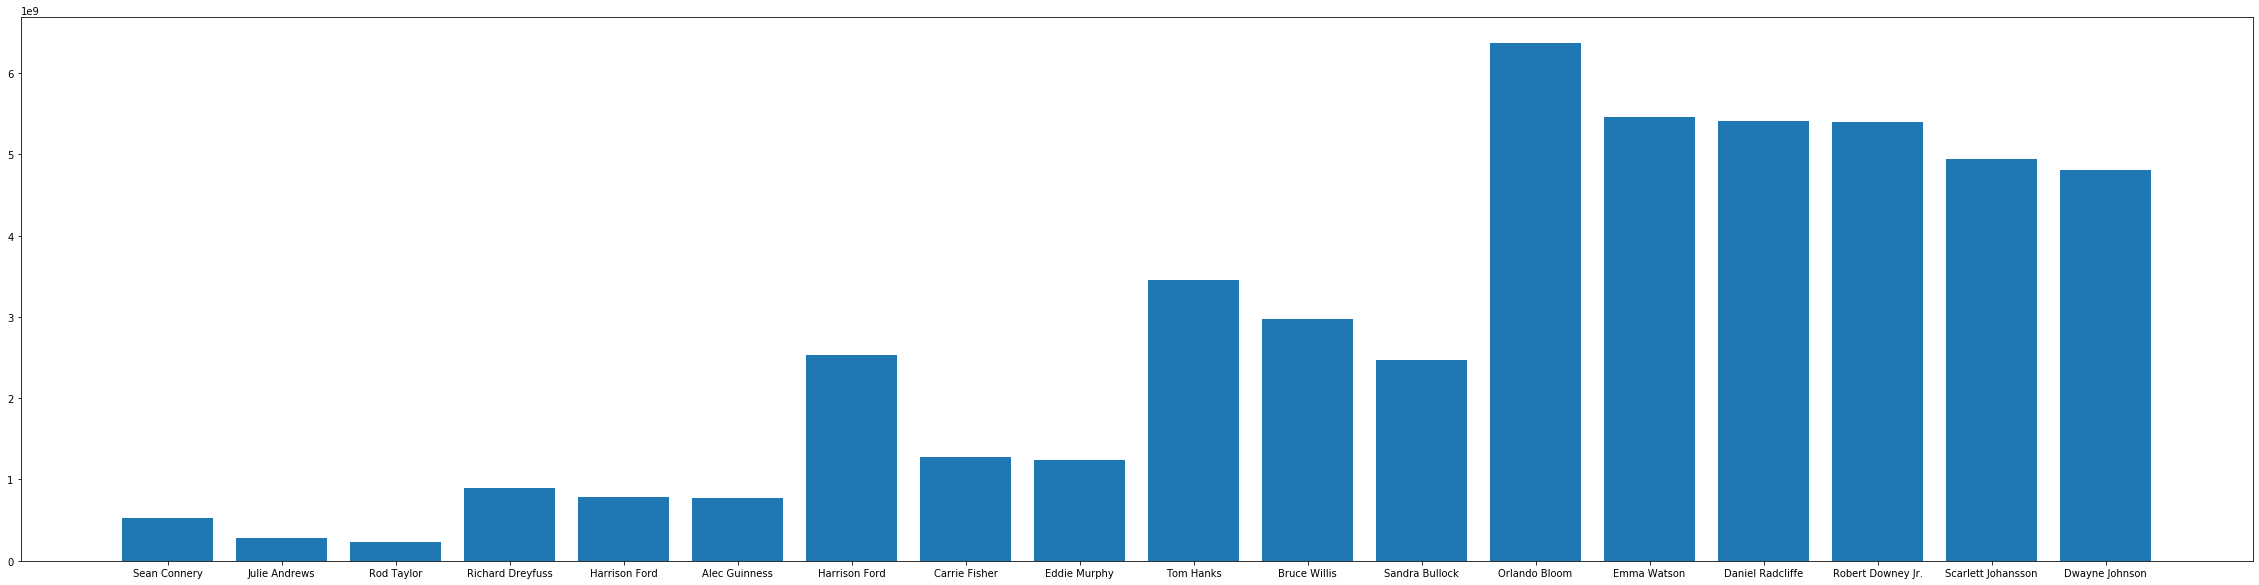

In [792]:
plt.figure(figsize = (40, 10))
plt.bar(x = lct, height=df_cast_plot_reven['revenue'], tick_label = df_cast_plot_reven.cast_name)
plt.show()

In [793]:
df_cast_plot_adj = pd.DataFrame({})
for i in cut_lab:
    df_cast_plot_adj = df_cast_plot_adj.append(df_cast_result.query('decade == "{}"'.format(i)).sort_values(by = 'revenue_adj', ascending = False)[:3])

In [794]:
df_cast_plot_adj.reset_index([0, 'decade', 'cast_name'], inplace = True)

<BarContainer object of 18 artists>

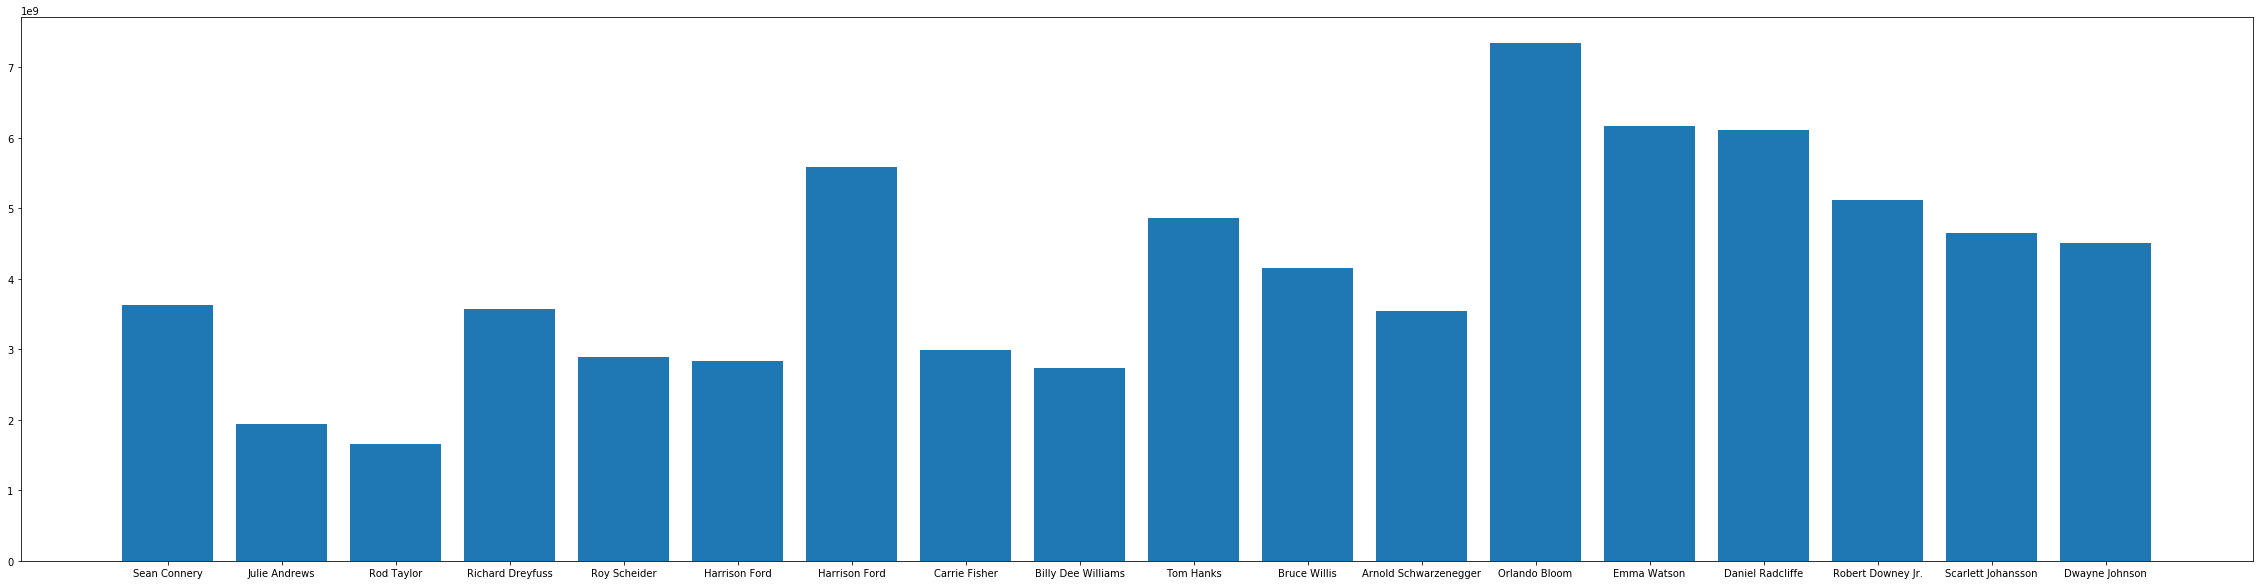

In [795]:
plt.figure(figsize = (40, 10))
plt.bar(x = lct, height = df_cast_plot_adj.revenue_adj, tick_label = df_cast_plot_adj.cast_name)

In [796]:
set(list(df_cast_plot_reven.cast_name)).difference(list(df_cast_plot_adj.cast_name))

{'Alec Guinness', 'Eddie Murphy', 'Sandra Bullock'}

<a id='conclusions'></a>
## 4. Conclusions

### 4.1. The most revenues are acquired by large franchises like Starwar, Harry Potter and many trilogies. Although commertial movies achieves great margin, small budget films are more likely to have a higher ratio of payback.

### 4.2. The most profitable actors/actresses are as listed. Note that considering inflation, the overall income of casts are still rising. Harrison Ford may be an exception for his peak lasts two decades.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])